In [ ]:
## This scripts create a simple vertical cross-section plot from a netcdf file created by m2section HYCOM-CICE-ECOSMO

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
# import pydap
# from pydap.client import open_url

In [10]:
year1=1992
year2=1992

for year in range(year1, year2+1):
    print("Year: %d" % (year))
    # Open and read the NetCFD file
    #ncfile='Data/FR1_Sec_' + str(year) + '.nc';
    ncfile='transports2.nc';
    fh =  Dataset(ncfile, mode='r')
    time = fh.variables['time'][:]
    lon = fh.variables['section_lon'][:]
    lat = fh.variables['section_lat'][:]
#     li = fh.variables['intf_lower'][:] # layer interphases for plotting
    temp = fh.variables['vol_transport'][:]
#     salin = fh.variables['salin'][:]
#     oxy = fh.variables['ECO_oxy'][:]
    
    if (year==year1):
        temp_mean = np.mean(temp,0)
#         salin_mean = np.mean(salin,0)
#         oxy_mean = np.mean(oxy,0)
#         temp2salin_mean = temp_mean/salin_mean
        li_mean = np.mean(time,0) 
    else:
        temp_mean = temp_mean + np.mean(salin,0)
#         salin_mean = salin_mean + np.mean(salin,0) 
#         oxy_mean = oxy_mean + np.mean(oxy,0)
#         temp2salin_mean = temp2salin_mean + temp_mean/salin_mean
        li_mean = li_mean + np.mean(time,0)
    
    fh.close()
    
temp_mean=temp_mean/(year2-year1+1)
# salin_mean=salin_mean/(year2-year1+1)
# oxy_mean=oxy_mean/(year2-year1+1)
# temp2salin_mean=temp2salin_mean/(year2-year1+1)

Year: 1992


ValueError: not enough values to unpack (expected 2, got 1)

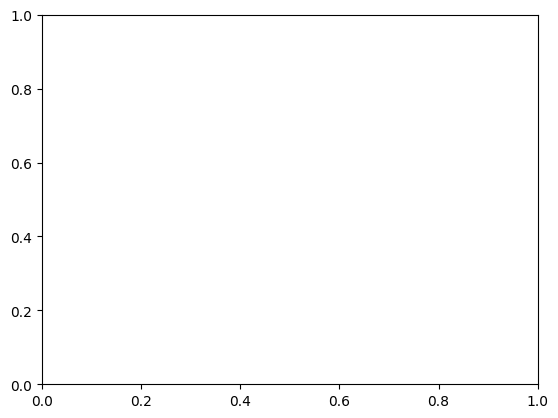

In [13]:
fig = plt.figure()
plt.pcolor(lat,li_mean,temp_mean)
plt.colorbar()

# plt.savefig('section_plot_temp_40-80_0.jpg',bbox_inches='tight',dpi=300)
!pwd

/tmp/ipykernel_84096/955478989.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(lon,-li_mean,salin_mean)


/media/akashs/FA22E72622E6E69B/DATA1_disk/1_NANSEN/2_MODELLING/HYCOM_ECOSMO/transport_plots


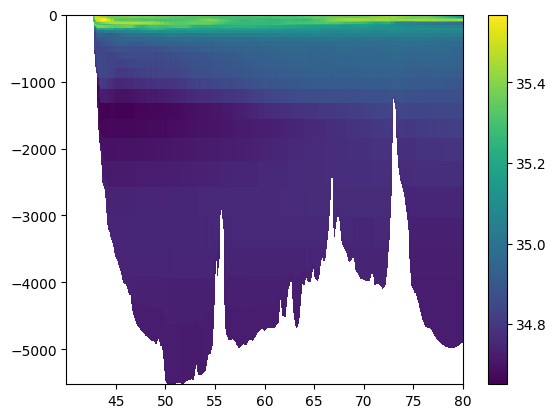

In [11]:
fig = plt.figure()
plt.pcolor(lon,-li_mean,salin_mean)
plt.colorbar()

plt.savefig('section_plot_salin_40-80_0.jpg',bbox_inches='tight',dpi=300)
!pwd

/tmp/ipykernel_84096/162225207.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(lon,-li_mean,oxy_mean)


/media/akashs/FA22E72622E6E69B/DATA1_disk/1_NANSEN/2_MODELLING/HYCOM_ECOSMO/transport_plots


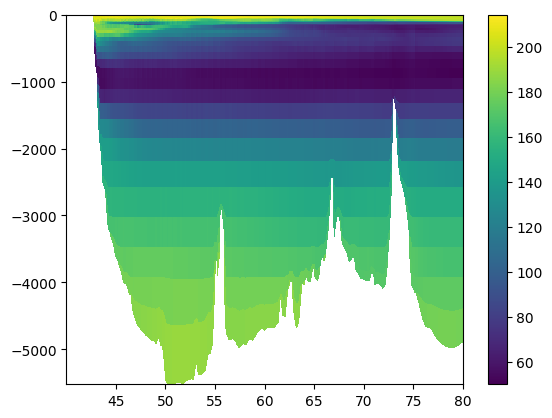

In [13]:
fig = plt.figure()
plt.pcolor(lon,-li_mean,oxy_mean)
plt.colorbar()

plt.savefig('section_plot_oxy_40-80_0.jpg',bbox_inches='tight',dpi=300)
!pwd